# Journal Entry Test

This is a template jupyter notebook to perform journal entry tests upon request of the financial audit team. 

## Instructions

Make sure that you are not saving this repository on a network drive, as this may cause issues with the virtual environment because the resolved network path may differ from the path used to create the virtual environment. 

First of all, you need to download the journal entry test template from the [JET repository](https://github.com/tlex-web/journal-entry-tests.git) and save it to your local machine. To do so, run the following command:

```bash
git clone https://github.com/tlex-web/journal-entry-tests.git
```

You need to create a virtual environment for python using the `venv` module. To do so, open a command prompt and run the following command, assuming you are in the root folder of the JET repository and have at least Python 3.10 installed on your machine:

```bash
python.exe -m venv venv
```

Once the virtual environment is created, you need to activate it. To do so, run the following command:

```bash
\venv\scripts\activate.bat
```

Once the virtual environment is activated, you need to install the dependencies. To do so, run the following command:

```bash
pip install -r requirements.txt
```

You can now run the notebook. To do so, run the following command:

```bash
jupyter-lab
```

Once the notebook is running, you can open the notebook by clicking on the `JET.ipynb` file in the file browser.

**_or_** 

You can also open and run the notebook directly in Visual Studio Code. To do so, open the `JET.ipynb` file in Visual Studio Code and click on the `Run Cell` button in the top right corner of the notebook.


## Input

The following information is required to run the journal entry test:

* **Journal Entry Test Date**: The date the journal entry test was performed.
* **Journal Entry Test Performed By**: The name of the person who performed the journal entry test.
* **Journal Entry Test Reviewed By**: The name of the person who reviewed the journal entry test.
* **Journal Entry Test Reviewed Date**: The date the journal entry test was reviewed.
* **General Ledger**: The general ledger of the company.
* **Trial Balance**: The trial balance of the company.

The `General Ledger` and `Trial Balance` files must be in CSV format. The `General Ledger` file must at least contain the following columns:

* **Account**: The account number.
* **Account Description**: The account description.
* **Debit**: The debit amount.
* **Credit**: The credit amount.
* **Date**: The date of the transaction.
* **Journal Entry**: The journal entry number.
* **Journal Entry Description**: The journal entry description.

The `Trial Balance` file must at least contain the following columns:

* **Account**: The account number.
* **Account Description**: The account description.
* **Debit**: The debit amount.
* **Credit**: The credit amount.

The `General Ledger` and `Trial Balance` files must be saved in the `data` folder. The `General Ledger` file must be named `general_ledger.csv` and the `Trial Balance` file must be named `trial_balance.csv`.

## Output

The notebook is designed to automatically generate the following file structure:

```
.
├── JET.ipynb
├── JET.pdf
├── JET.html
├── /data/
    ├── /data/general__ledger.csv
    ├── /data/trial_balance.csv
    ├── /data/data.csv
├── /helpers/helpers.py
└── /results/
    ├── /JB0/results.xlsx | no_result.txt
    ├── /JB1/results.xlsx | no_result.txt
    ├── /JB2/results.xlsx | no_result.txt
    ├── /JB3/results.xlsx | no_result.txt
    ├── /JB4/results.xlsx | no_result.txt
    ├── /JB5/results.xlsx | no_result.txt
    ├── /JB6/results.xlsx | no_result.txt
    ├── /JB7/results.xlsx | no_result.txt
    ├── /JB8/results.xlsx | no_result.txt
    ├── /JB9/results.xlsx | no_result.txt
    └── /JB10/results.xlsx | no_result.txt
``` 

The `JET.ipynb` notebook is the template notebook that you downloaded from the JET repository. The `JET.pdf` and `JET.html` files are copies of the notebook in PDF and HTML format. The `data` folder contains the data used to perform the journal entry test. The `results` folder contains the results of the journal entry test. The results are stored in Excel format. If no results are found for a journal entry test, a `no_result.txt` file is created in the corresponding journal entry test folder. The `helpers.py` file contains the helper functions used to perform the journal entry test.

## Dependencies

The following dependencies are required to run the journal entry test:

* [Python 3.10](https://www.python.org/downloads/release/python-310/)
* [Jupyter Notebook latests release](https://jupyter.org/)
* [Pandas latests release](https://pandas.pydata.org/)
* [Numpy latests release](http://www.numpy.org/)
* [Plotly latests release](https://plotly.com/)
* [Matplotlib latests release](https://matplotlib.org/)
* [Seaborn latests release](https://seaborn.pydata.org/)
* [XlsxWriter latests release](https://xlsxwriter.readthedocs.io/)

Please note that the notebook is designed to automatically install the required dependencies if they are not already installed on your machine. In case the automatic installation fails, please install the dependencies manually using the `pip install` command to install the dependencies listed in the `requirements.txt` lock file.

## Import and Sanitization

In [111]:
# load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.offline
import seaborn as sns
import missingno as msno

import os
import json

# offline plot setting
plotly.offline.init_notebook_mode(connected=True)

In [112]:
# load internal libraries
from helpers.helpers import get_holidays

In [113]:
# create data folder if not exists
if not os.path.exists('data'):
    os.makedirs('data')

with os.scandir('data') as entries:
    if not any(entries):
        with open('place GL and TB csv files here.txt', 'w') as f:
            f.write('')

# create results folder and all subfolders for the JET tests if they do not yet exists
if not os.path.exists('results'):
    os.makedirs('results')

for i in range(0, 11):
    if not os.path.exists('results/JB' + str(i)):
        os.makedirs('results/JB' + str(i))

In [114]:
# constants
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [115]:
# global variables
jet_execution_date = '2021-12-31'
jet_execution_person = 'John Doe'
jet_execution_review_date = '2022-01-01'
jet_execution_reviewer = 'Jane Doe'

# notebook variables
relative_path = './data/'
filename_gl = relative_path + 'general_ledger.csv' # Please update if you want to use a different file
filename_tb = relative_path + 'trial_balance.csv' # Please update if you want to use a different file

Please remember to change the text encoding to `UTF-8` when importing the `General Ledger` and `Trial Balance` files. This is to ensure that the files are imported correctly. 
You can do so by opening the files in a text editor such as [Notepad++](https://notepad-plus-plus.org/downloads/) or the [Notepad](https://apps.microsoft.com/store/detail/windows-notepad/9MSMLRH6LZF3) and changing the encoding to `UTF-8` in the `Encoding` menu while saving the files.

In [116]:
# data import 
# set the appropriate decimal and separator characters
df_gl = pd.read_csv(filename_gl, sep = ";", decimal = ",")
df_tb = pd.read_csv(filename_tb, sep = ";", decimal = ",")

# check if all columns are correctly imported and the floating point numbers are correctly interpreted
df_gl.head()

,Buch'nr.,Zeilenr.,Belegdat.,Belegnr.,Sollkto.,S'betrag EUR,S'betrag EUR.1,Habenkto.,H'betrag EUR,Buch'text,Währung,Benutzer,Buch'datum,Belegherkunft
0,483476,1,01.01.2021,R02289401 2022,4360.0,51.86,51.86,NaN,NaN,lalux - Leudelange,EUR,hess,01/01/2022,stapelbuchen
1,483476,2,01.01.2021,R02289401 2022,NaN,NaN,NaN,72072.0,51.86,lalux - Leudelange,EUR,hess,02/01/2022,stapelbuchen
2,483476,3,01.01.2021,R02289401 2022,NaN,NaN,NaN,1600.0,51.86,lalux - Leudelange,EUR,hess,03/01/2022,stapelbuchen
3,483931,1,06.06.2021,3022100219105-01,4138.0,1533.08,1533.08,NaN,NaN,BG RCI - Heidelberg,EUR,hess,04/01/2022,stapelbuchen
4,483931,2,06.06.2021,3022100219105-01,NaN,NaN,NaN,71781.0,1533.08,BG RCI - Heidelberg,EUR,hess,05/01/2022,stapelbuchen


In [117]:
# check data types 
df_gl.dtypes, df_tb.dtypes

(Buch'nr.            int64
 Zeilenr.            int64
 Belegdat.          object
 Belegnr.           object
 Sollkto.          float64
 S'betrag EUR      float64
 S'betrag EUR.1    float64
 Habenkto.         float64
 H'betrag EUR      float64
 Buch'text          object
 Währung            object
 Benutzer           object
 Buch'datum         object
 Belegherkunft      object
 dtype: object,
 Nr.              int64
 Bezeichnung     object
 Soll           float64
 Haben          float64
 Soll2          float64
 Haben3         float64
 Soll4          float64
 Haben5         float64
 Soll6          float64
 Haben7         float64
 dtype: object)

In [118]:
# sanitize data 
# change column names and data types in place 
# do so for both dataframes and all columns that need to be changed

def sanitize_gl(df: pd.DataFrame) -> pd.DataFrame:

    # lowercase column names
    df.columns = df.columns.str.lower()

    # rename columns
    df = df.rename(columns={
    "buch'nr.": "booking_nr",
    "buch'datum": "booking_date",
    "belegherkunft": "document_source",
    "benutzer": "user",
    "zeilenr.": "line_nr",
    "belegdat.": "document_date",
    "belegnr.": "document_nr",
    "betrag": "amount",
    "währung": "currency",
    "buch'text": "description",
    "sollkto.": "debit_account",
    "habenkto.": "credit_account",
    "s'betrag eur": "debit_amount",
    "h'betrag eur": "credit_amount",
    })

    # cast data types 

    # numbers 
    df["booking_nr"] = df["booking_nr"].astype("Int64") # remove the trailling commas
    df["booking_nr"] = df["booking_nr"].astype('category')
    
    # dates
    df["document_date"] = pd.to_datetime(df["document_date"], format="mixed", errors="coerce")

    # strings 
    df["document_date"] = df["document_date"].astype(str)
    df["description"] = df["description"].astype(str)
    df["currency"] = df["currency"].astype(str)

    # category
    df["credit_account"] = df["credit_account"].astype("Int64") # remove the trailling commas
    df["credit_account"] = df["credit_account"].astype("category")
    df["debit_account"] = df["debit_account"].astype("Int64")
    df["debit_account"] = df["debit_account"].astype("category")
    
    return df

def sanitize_tb(df: pd.DataFrame) -> pd.DataFrame:

    # lowercase column names
    df.columns = df.columns.str.lower()

    # rename columns
    df = df.rename(columns={
    "nr.": "kontonummer",
    "bezeichnung": "kontobezeichnung",
    "soll": "soll_ob",
    "haben": "haben_ob",
    "soll2": "soll_periode_13",
    "haben3": "haben_periode_13",
    "soll4": "soll_periode_12",
    "haben5": "haben_periode_12",
    "soll6": "soll_saldo",
    "haben7": "haben_saldo"})

    # cast data types 
    df["kontobezeichnung"] = df["kontobezeichnung"].astype(str)

    # category
    df["kontonummer"] = df["kontonummer"].astype("Int64") # remove the trailing commas
    df["kontonummer"] = df["kontonummer"].astype("category")
    
    
    return df


# change df in place
df_gl = sanitize_gl(df_gl)
df_tb = sanitize_tb(df_tb)

df_gl.dtypes, df_tb.dtypes

(booking_nr         category
 line_nr               int64
 document_date        object
 document_nr          object
 debit_account      category
 debit_amount        float64
 s'betrag eur.1      float64
 credit_account     category
 credit_amount       float64
 description          object
 currency             object
 user                 object
 booking_date         object
 document_source      object
 dtype: object,
 kontonummer         category
 kontobezeichnung      object
 soll_ob              float64
 haben_ob             float64
 soll_periode_13      float64
 haben_periode_13     float64
 soll_periode_12      float64
 haben_periode_12     float64
 soll_saldo           float64
 haben_saldo          float64
 dtype: object)

In [119]:
# remove redundant information 
del df_gl["s'betrag eur.1"]

In [120]:
# in case you need to join the general ledger with the header file, please uncomment the following lines
# join the header file with the general ledger file to populate the GL with the missing information from the header file and keep all the information from the GL file

# df_gl_ = pd.merge(df_gl, df_header, on = "index", how = "outer", suffixes = ('_left', '_right'))

# df_gl_.to_excel('data/general_ledger_complete.xlsx', index=False, sheet_name='GL')

# len(df_gl), len(df_gl_), df_gl_.head()

In [121]:
# export column names as a dictionary to quickly access the column names
dict_columns_gl = dict(zip(df_gl.columns, range(len(df_gl.columns))))
dict_columns_tb = dict(zip(df_tb.columns, range(len(df_tb.columns))))

with open('dict_columns_gl.json', 'w') as fp:
    json.dump(dict_columns_gl, fp)

with open('dict_columns_tb.json', 'w') as fp:
    json.dump(dict_columns_tb, fp)

## Missing values

__investigate missing values__

check if there are any missing values in the dataframes and explain why they are missing

e.g. missing values in the general ledger file are due to the fact that the header file is missing information for the respective booking and the debit and credit amounts for each booking are stored in separate rows.

e.g. missing values in the trial balance file are due to the fact that the account is not used in the respective period

In [122]:
# Count Missing Values per Variable und in DataFrame überführen
y_count_mv = pd.DataFrame(df_gl.isnull().sum())
y_count_mv.columns = ['count']
y_count_mv.index.names = ['Name']
y_count_mv['Name'] = y_count_mv.index
y_count_mv = y_count_mv[y_count_mv['count'] != 0]
y_count_mv.sort_values(by=['count'], inplace=True, ascending=True)


missing_values = pd.DataFrame(y_count_mv['count'] / len(df_gl) * 100)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values.sort_values(by=['count'], inplace=True, ascending=True)

x = y_count_mv['Name']

# Creating two subplots
fig = sp.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=missing_values['count'],
    y=x,
    marker=dict(
        color='rgba(18, 63, 90, 0.95)',
        line=dict(
            color='rgba(18, 63, 90, 1.0)',
            width=1),
    ),
    name='Relative amount of missing values (%)',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_count_mv['count'], y=x,
    mode='lines+markers',
    line_color='rgb(0, 68, 27)',
    name='Absolute values of missing values',
), 1, 2)

fig.update_layout(
    title='Absolute and relative amount of missing values per variable',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        dtick=2000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(missing_values['count'], decimals=2)
y_nw = np.rint(y_count_mv['count'])

# add labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn + 500 if ydn == max(y_nw) else ydn -500, # move the label to the left side if it is the maximum value
                            text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 68, 27)'),
                            showarrow=False))
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 0.75,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(18, 63, 90)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

<Axes: >

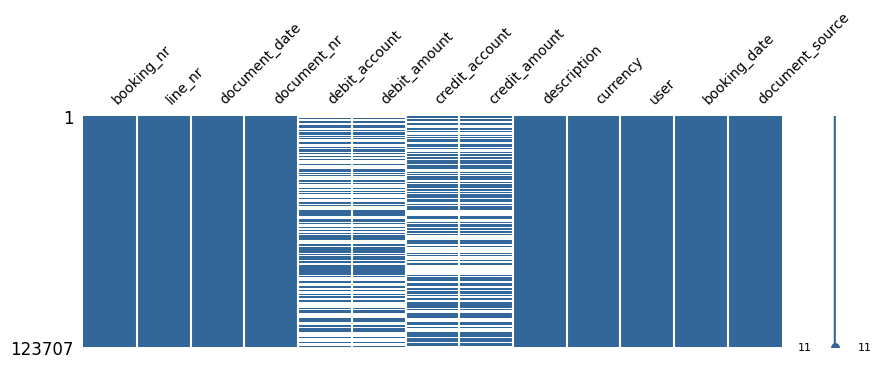

In [123]:
msno.matrix(df_gl, figsize=(10, 3), fontsize=10, color=(0.2, 0.4, 0.6))

<Axes: xlabel='Name', ylabel='Name'>

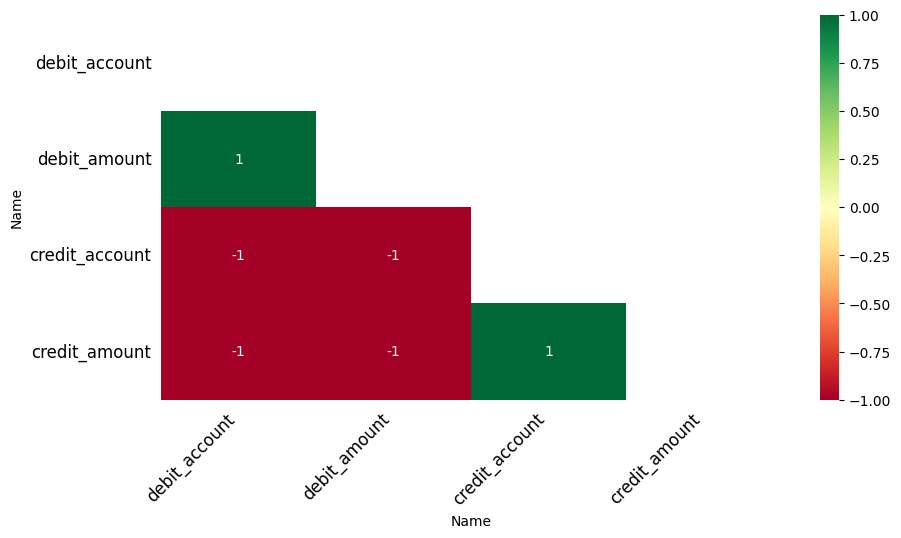

In [124]:
msno.heatmap(df_gl, figsize=(10, 5), fontsize=12, cmap="RdYlGn")

Since the debit and credit amounts for each booking are stored in separate rows, the debit account and amount is exactly negative correlated with the credit account and amount. So the presence of missing values can be explained. 

## JB 0: reconciliation of line item control totals

Reconciliation of the control totals (total amount and line item count) of the Journal Entry Data file(s) provided by the engagement team during the import process and the data imported and used for journal entry analysis. For each Journal Entry Data file, the report also displays the effective and entry date ranges. This report also displays a reconciliation of the control totals (beginning and ending balances and line item count) provided during the import process for the Trial Balance Data file(s), when applicable, to the data imported and used for journal entry analysis.

### Account numbers 

In [125]:
# check which accounts are used most often
df_debit_acc = round(df_gl["debit_account"].value_counts(normalize = True).to_frame(),2) 
df_credit_acc = round(df_gl["credit_account"].value_counts(normalize = True).to_frame(),2)

df_debit_acc.head(10), df_credit_acc.head(10)

(               proportion
 debit_account            
 1600                 0.14
 1400                 0.10
 8726                 0.07
 1563                 0.07
 1200                 0.06
 1763                 0.03
 1210                 0.03
 1581                 0.03
 3425                 0.02
 4983                 0.02,
                 proportion
 credit_account            
 1600                  0.14
 1400                  0.14
 8125                  0.09
 1210                  0.08
 1763                  0.06
 1200                  0.05
 1563                  0.03
 3725                  0.03
 1762                  0.02
 1220                  0.02)

There are 1342 debit accounts and 1222 credit accounts present in the GL.

In [126]:
# save indices for all NAs to get the respective amounts 
index_debit_na = df_gl.index[pd.isna(df_gl["debit_account"]) == False]
index_credit_na = df_gl.index[pd.isna(df_gl["credit_account"]) == False]

amounts_debit = df_gl["debit_amount"].loc[index_debit_na].to_frame("debit_amount")
amounts_debit.insert(1, "debit_account", df_gl["debit_account"].loc[index_debit_na], True)
amounts_credit = df_gl["credit_amount"].loc[index_credit_na].to_frame("credit_amount")
amounts_credit.insert(1, "credit_account", df_gl["credit_account"].loc[index_credit_na], True)

# length equals the length of the original variable, so I assume there is no error here
amounts_debit = amounts_debit.groupby("debit_account")["debit_amount"].sum().to_frame()
amounts_credit = amounts_credit.groupby("credit_account")["credit_amount"].sum().to_frame()
amounts_debit = amounts_debit.reset_index()
amounts_credit = amounts_credit.reset_index()

In [127]:
# print the total amount of debit and credit
amounts_debit["debit_amount"].sum(), amounts_credit["credit_amount"].sum()

(554834924.85, 552962013.6799998)

### Debit and Credit 

### Debit

In [128]:
gl_sum_debit = round(df_gl["debit_amount"].dropna().sum(), 2)
gl_sum_debit

554834924.85

In [129]:
tb_sum_debit = round(df_tb["soll_periode_12"].dropna().sum() + df_tb["soll_ob"].dropna().sum() + df_tb["soll_periode_13"].dropna().sum(), 2)
tb_sum_debit

456475611.45

### Credit

In [130]:
gl_sum_credit = df_gl["credit_amount"].dropna().sum()
gl_sum_credit

552962013.6800001

In [131]:
tb_sum_credit = round(df_tb["haben_periode_12"].dropna().sum() + df_tb["haben_ob"].dropna().sum() + df_tb["haben_periode_13"].dropna().sum(), 2)
tb_sum_credit

456475611.45

### Difference in the GL

In [132]:
gl_diff_debit_credit = gl_sum_debit - gl_sum_credit
gl_diff_debit_credit

1872911.169999957

### Difference in the TB

In [133]:
tb_diff_debit_credit = tb_sum_debit - tb_sum_credit
tb_diff_debit_credit

0.0

In [134]:
# create report of the reconciliation
report = pd.DataFrame({"GL": [gl_sum_debit, gl_sum_credit, gl_diff_debit_credit], "TB": [tb_sum_debit, tb_sum_credit, tb_diff_debit_credit]}, index = ["Debit", "Credit", "Difference"])

if gl_diff_debit_credit == 0 and tb_diff_debit_credit == 0:
    with open('No differences found.txt', 'w') as f:
        f.write('No differences found')
else:
    report.to_excel('results/JB0/reconciliation_results.xlsx', sheet_name='report', index = True, header=True, float_format="%.2f", engine='xlsxwriter')

## JB 1: journal entries do not balance to zero

This report contains both a summary and a detailed listing of journal entries that do not balance to zero (i.e. debits do not equal credits) for the current, subsequent, and prior periods.

### Compare GL and TB

In [135]:
# merge the debit and credit sums into one dataframe
df_gl_sums = pd.concat([amounts_debit, amounts_credit], ignore_index=True, sort=False)

In [136]:
# save two separate dataframes for credit and debit accounts with the corresponding TB accounts
df_credit_gl_tb = df_gl_sums[df_gl_sums["credit_account"].isin(df_tb["kontonummer"])]
df_debit_gl_tb = df_gl_sums[df_gl_sums["debit_account"].isin(df_tb["kontonummer"])]

print(df_credit_gl_tb.shape, df_debit_gl_tb.shape)

(178, 4) (292, 4)


In [137]:
# compare the sums of the GL and the TB for each credit account and save the difference 

acc_with_diff_credit = []
sum_diff_credit = 0

for acc in df_credit_gl_tb["credit_account"]:
    sum_gl = round(df_credit_gl_tb["credit_amount"].loc[df_credit_gl_tb.index[df_credit_gl_tb["credit_account"] == acc]].sum(), 2)
    sum_tb = round(df_tb["haben_periode_12"].loc[df_tb.index[df_tb["kontonummer"] == acc]].sum(), 2)
    if sum_gl != sum_tb:
        acc_with_diff_credit.append(acc)
        sum_diff_credit += sum_gl - sum_tb
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.FAIL}NOT OK{bcolors.ENDC}")
    else:
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.OKGREEN}OK{bcolors.ENDC}")

pd.DataFrame(acc_with_diff_credit).to_excel('./results/JB1/credit_diff_gl_tb.xlsx', sheet_name='GL vs TB' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

Account: 23 GL: 14495.0 TB: 14495.0 OK
Account: 25 GL: 8159.2 TB: 8159.2 OK
Account: 26 GL: 26646.0 TB: 26646.0 OK
Account: 27 GL: 1231.25 TB: 1231.25 OK
Account: 30 GL: 24000.0 TB: 24000.0 OK
Account: 35 GL: 60000.0 TB: 60000.0 OK
Account: 85 GL: 10649.0 TB: 10649.0 OK
Account: 175 GL: 23203.13 TB: 23203.13 OK
Account: 180 GL: 39200.0 TB: 39200.0 OK
Account: 187 GL: 46977.0 TB: 46977.0 OK
Account: 188 GL: 91790.0 TB: 91790.0 OK
Account: 190 GL: 50143.0 TB: 50143.0 OK
Account: 191 GL: 68655.0 TB: 68655.0 OK
Account: 215 GL: 16412.79 TB: 16412.79 OK
Account: 216 GL: 75308.88 TB: 75308.88 OK
Account: 284 GL: 133278.0 TB: 133278.0 OK
Account: 325 GL: 84941.35 TB: 84941.35 OK
Account: 380 GL: 9273.99 TB: 9273.99 OK
Account: 385 GL: 6535.0 TB: 6535.0 OK
Account: 400 GL: 62119.9 TB: 62119.9 OK
Account: 403 GL: 61806.49 TB: 61806.49 OK
Account: 405 GL: 676088.57 TB: 676088.57 OK
Account: 408 GL: 4329.0 TB: 4329.0 OK
Account: 411 GL: 59944.9 TB: 59944.9 OK
Account: 414 GL: 8125.0 TB: 8125.0 OK

In [138]:
# compare the sums of the GL and the TB for each debit account and save the difference

acc_with_diff_debit = []
sum_diff_debit = 0

for acc in df_debit_gl_tb["debit_account"]:
    sum_gl = round(df_debit_gl_tb["debit_amount"].loc[df_debit_gl_tb.index[df_debit_gl_tb["debit_account"] == acc]].sum(), 2)
    sum_tb = round(df_tb["soll_periode_12"].loc[df_tb.index[df_tb["kontonummer"] == acc]].sum(), 2)
    if sum_gl != sum_tb:
        acc_with_diff_debit.append(acc)
        sum_diff_debit += sum_gl - sum_tb
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.FAIL}NOT OK{bcolors.ENDC}")
    else:
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.OKGREEN}OK{bcolors.ENDC}")

pd.DataFrame(acc_with_diff_debit).to_excel('./results/JB1/debit_diff_gl_tb.xlsx', sheet_name='GL vs TB' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

Account: 22 GL: 14495.0 TB: 14495.0 OK
Account: 23 GL: 22620.0 TB: 22620.0 OK
Account: 25 GL: 8159.2 TB: 8159.2 OK
Account: 26 GL: 8125.0 TB: 8125.0 OK
Account: 27 GL: 61176.15 TB: 61176.15 OK
Account: 176 GL: 20737.13 TB: 20737.13 OK
Account: 180 GL: 39200.0 TB: 39200.0 OK
Account: 210 GL: 54051.7 TB: 54051.7 OK
Account: 280 GL: 206000.0 TB: 206000.0 OK
Account: 291 GL: 245721.14 TB: 245721.14 OK
Account: 320 GL: 4627.35 TB: 4627.35 OK
Account: 354 GL: 10000.0 TB: 10000.0 OK
Account: 381 GL: 24500.0 TB: 24500.0 OK
Account: 384 GL: 5725.0 TB: 5725.0 OK
Account: 400 GL: 91896.33 TB: 91896.33 OK
Account: 403 GL: 745421.87 TB: 745421.87 OK
Account: 408 GL: 4329.0 TB: 4329.0 OK
Account: 411 GL: 319108.38 TB: 319108.38 OK
Account: 412 GL: 10490.55 TB: 10490.55 OK
Account: 414 GL: 8125.0 TB: 8125.0 OK
Account: 415 GL: 13289.58 TB: 13289.58 OK
Account: 416 GL: 4329.0 TB: 4329.0 OK
Account: 423 GL: 32177.85 TB: 32177.85 OK
Account: 480 GL: 4276.8 TB: 4276.8 OK
Account: 483 GL: 43838.79 TB: 438

0 0


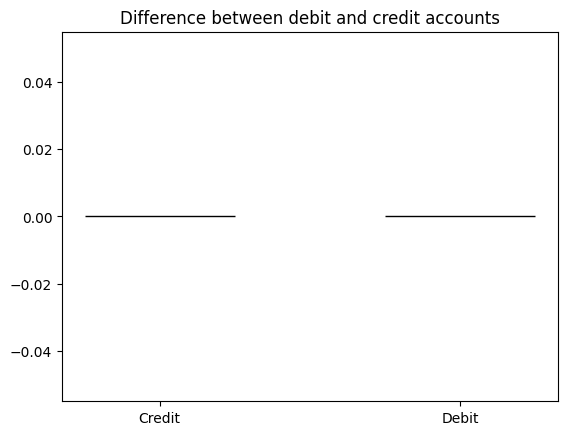

In [139]:
# the difference between the sum of debit and credit accounts in the GL and the TB is identical and therefore balanced between the GL and the TB

print(np.abs(sum_diff_debit), np.abs(sum_diff_credit))

plt.bar(x=["Credit", "Debit"], height=[np.abs(sum_diff_credit), np.abs(sum_diff_debit)], color=["black", "gray"], width=0.5, align="center", edgecolor="black")
plt.title("Difference between debit and credit accounts")
plt.show()

### Compare all accounts in the GL

In [140]:
# investigate the difference between the sum of debit and credit accounts for each account in the GL as debit - credit

#df_gl_diff = df_gl_sums.loc[df_gl_sums.index[df_gl_sums["debit_account"].astype(str) == df_gl_sums["credit_account"].astype(str)]]["sollbetrag_eur"] == df_gl_sums.loc[df_gl_sums.index[df_gl_sums["debit_account"].astype(str) == df_gl_sums["credit_account"].astype(str)]]["habenbetrag_eur"]
#df_gl_sums["diff"] = df_gl_sums["diff"].fillna(0)
#df_gl_sums["diff"] = df_gl_sums["diff"].astype(int)
#df_gl_sums = df_gl_sums.sort_values(by=["diff"], ascending=False)
#df_gl_diff

In [141]:
gl_acc = []
gl_acc_diff = []
df_gl_acc_diff = pd.DataFrame()


for acc in df_gl_sums["debit_account"]:
    sum_debit = round(df_gl_sums["debit_amount"].loc[df_gl_sums.index[df_gl_sums["debit_account"] == acc]].sum(), 2)
    sum_credit = round(df_gl_sums["credit_amount"].loc[df_gl_sums.index[df_gl_sums["credit_account"] == acc]].sum(), 2)
    diff = sum_debit - sum_credit
    gl_acc.append(acc)
    gl_acc_diff.append(diff)
    if diff != 0:
        print(f"Account: {acc} Debit: {sum_debit} Credit: {sum_credit} {bcolors.FAIL} Diff: {diff}{bcolors.ENDC}")

df_gl_acc_diff["konto"] = gl_acc
df_gl_acc_diff["debit"] = [round(df_gl_sums["debit_amount"].loc[df_gl_sums.index[df_gl_sums["debit_account"] == acc]].sum(), 2) for acc in gl_acc]
df_gl_acc_diff["credit"] = [round(df_gl_sums["credit_amount"].loc[df_gl_sums.index[df_gl_sums["credit_account"] == acc]].sum(), 2) for acc in gl_acc]
df_gl_acc_diff["diff"] = gl_acc_diff


df_gl_acc_diff = df_gl_acc_diff.drop(df_gl_acc_diff[(df_gl_acc_diff["konto"].isna()) | (df_gl_acc_diff["diff"] == 0)].index).reset_index(drop=True)

if df_gl_acc_diff.empty == False:
    df_gl_acc_diff.to_excel('./results/JB1/gl_acc_diff.xlsx', sheet_name='GL acc difference' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('./results/JB1/no_gl_acc_diff.txt', 'w') as f:
        f.write('No difference between debit and credit accounts in the GL')

Account: 22 Debit: 14495.0 Credit: 0.0  Diff: 14495.0
Account: 23 Debit: 22620.0 Credit: 14495.0  Diff: 8125.0
Account: 26 Debit: 8125.0 Credit: 26646.0  Diff: -18521.0
Account: 27 Debit: 61176.15 Credit: 1231.25  Diff: 59944.9
Account: 176 Debit: 20737.13 Credit: 0.0  Diff: 20737.13
Account: 210 Debit: 54051.7 Credit: 0.0  Diff: 54051.7
Account: 280 Debit: 206000.0 Credit: 0.0  Diff: 206000.0
Account: 291 Debit: 245721.14 Credit: 0.0  Diff: 245721.14
Account: 320 Debit: 4627.35 Credit: 0.0  Diff: 4627.35
Account: 354 Debit: 10000.0 Credit: 0.0  Diff: 10000.0
Account: 381 Debit: 24500.0 Credit: 0.0  Diff: 24500.0
Account: 384 Debit: 5725.0 Credit: 0.0  Diff: 5725.0
Account: 400 Debit: 91896.33 Credit: 62119.9  Diff: 29776.43
Account: 403 Debit: 745421.87 Credit: 61806.49  Diff: 683615.38
Account: 411 Debit: 319108.38 Credit: 59944.9  Diff: 259163.48
Account: 412 Debit: 10490.55 Credit: 0.0  Diff: 10490.55
Account: 415 Debit: 13289.58 Credit: 175102.59  Diff: -161813.01
Account: 416 Deb

Account: 70589 Debit: 2000.0 Credit: 0.0  Diff: 2000.0
Account: 70608 Debit: 3089.86 Credit: 1114.43  Diff: 1975.43
Account: 70623 Debit: 14241.41 Credit: 29357.65  Diff: -15116.240000000002
Account: 70630 Debit: 104888.05 Credit: 110389.05  Diff: -5501.0
Account: 70636 Debit: 312844.7 Credit: 321629.1  Diff: -8784.399999999965
Account: 70640 Debit: 430630.61 Credit: 398700.18  Diff: 31930.429999999993
Account: 70643 Debit: 419620.0 Credit: 322897.5  Diff: 96722.5
Account: 70677 Debit: 8082.8 Credit: 8489.63  Diff: -406.829999999999
Account: 70682 Debit: 2278.25 Credit: 587.15  Diff: 1691.1
Account: 70707 Debit: 134071.3 Credit: 125327.7  Diff: 8743.599999999991
Account: 70722 Debit: 4842.46 Credit: 5100.17  Diff: -257.71000000000004
Account: 70723 Debit: 26665.31 Credit: 29257.13  Diff: -2591.8199999999997
Account: 70747 Debit: 283797.96 Credit: 291966.8  Diff: -8168.839999999967
Account: 70774 Debit: 1665.95 Credit: 1539.79  Diff: 126.16000000000008
Account: 70786 Debit: 14658.93 Cre

In [142]:
# the difference for all accounts in the GL is ~19,089,361.26M EUR
# I cannot explain this difference and therefore I will not investigate it further

df_gl_acc_diff["diff"].sum()

19087149.740000013

### Compare all individual bookings in the GL

In [143]:
# prepare dataset with the booking number, account number, debit and credit amount

df_gl_acc_nr = df_gl[["booking_nr", "debit_account", "debit_amount", "credit_account", "credit_amount"]].copy().reset_index(drop=True)
df_gl_acc_nr["credit_account"] = df_gl_acc_nr["credit_account"].astype(str)
df_gl_acc_nr["debit_account"] = df_gl_acc_nr["debit_account"].astype(str)

print(f"Number of rows: {len(df_gl_acc_nr)}")
print(f"Number of unique booking numbers: {len(df_gl_acc_nr['booking_nr'].unique())}")

df_gl_acc_nr.head()

Number of rows: 123707
Number of unique booking numbers: 39212


Name,booking_nr,debit_account,debit_amount,credit_account,credit_amount
0,483476,4360,51.86,<NA>,NaN
1,483476,<NA>,NaN,72072,51.86
2,483476,<NA>,NaN,1600,51.86
3,483931,4138,1533.08,<NA>,NaN
4,483931,<NA>,NaN,71781,1533.08


In [144]:
# generate the sum of debit and credit amounts for each booking number
# the amount of unique booking numbers is identical to length of the dataset

df_gl_acc_nr_sums = df_gl_acc_nr.groupby(["booking_nr"]).sum().reset_index()
df_gl_acc_nr_sums

Name,booking_nr,debit_account,debit_amount,credit_account,credit_amount
0,483163,4988,196.00,725551600,392.00
1,483164,1563,33.32,1763,33.32
2,483168,3425,1936.26,706951600,3872.52
3,483169,1563,329.16,1763,329.16
4,483171,4983,416.00,722011600,832.00
...,...,...,...,...,...
39207,538494,4953,-6750.00,723241600,-13500.00
39208,538495,1562,-1147.50,1762,-1147.50
39209,538731,1536,4.51,2650,4.51
39210,538768,1536,6.68,2650,6.68


In [145]:
# get the sum of debit and credit amounts for each booking number 

df_gl_acc_nr_sums["diff"] = df_gl_acc_nr_sums["debit_amount"] - df_gl_acc_nr_sums["credit_amount"]
df_gl_acc_nr_sums = df_gl_acc_nr_sums.sort_values(by=["diff"], ascending=False).reset_index(drop=True)


print(f"Sum of the difference: {df_gl_acc_nr_sums['diff'].sum()}")
print(f"Number of booking numbers with difference: {len(df_gl_acc_nr_sums[df_gl_acc_nr_sums['diff'] != 0])}")
print(f"Amounts equal the overall difference: {round(df_gl_acc_nr_sums['diff'].sum(), 2) == round(gl_diff_debit_credit, 2)}")

df_gl_acc_nr_sums.to_excel('./results/JB1/sums_per_booking_nr.xlsx', sheet_name='Sums per booking number' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_gl_acc_nr_sums

Sum of the difference: 1872911.169999987
Number of booking numbers with difference: 29166
Amounts equal the overall difference: True


Name,booking_nr,debit_account,debit_amount,credit_account,credit_amount,diff
0,502979,299981476,2035626.02,2502,1017813.01,1017813.01
1,508897,299981476,2015558.76,2502,1007779.38,1007779.38
2,489814,299981476,1953102.06,2502,976551.03,976551.03
3,495762,299981476,1923330.38,2502,961665.19,961665.19
4,493141,299981476,1631947.94,2502,815973.97,815973.97
...,...,...,...,...,...,...
39207,493139,2501,815973.97,299981476,1631947.94,-815973.97
39208,495760,2501,961665.19,299981476,1923330.38,-961665.19
39209,489812,2501,976551.03,299981476,1953102.06,-976551.03
39210,508895,2501,1007779.38,299981476,2015558.76,-1007779.38


In [146]:
# exclude equal bookings with the same debit and credit amount

df_gl_acc_nr_sums_diff = df_gl_acc_nr_sums
df_gl_acc_nr_sums_diff["diff"] = df_gl_acc_nr_sums_diff["diff"].astype(int)
df_gl_acc_nr_sums_diff["diff"] = np.abs(df_gl_acc_nr_sums_diff["diff"])
df_gl_acc_nr_sums_diff = df_gl_acc_nr_sums_diff.sort_values(by=["diff"], ascending=False).reset_index(drop=True).drop_duplicates(subset=["diff"], keep="first").reset_index(drop=True)

# recalculate the difference to invert the creation of absolute values
df_gl_acc_nr_sums_diff["diff"] = df_gl_acc_nr_sums_diff["debit_amount"] - df_gl_acc_nr_sums_diff["credit_amount"]
df_gl_acc_nr_sums_diff = df_gl_acc_nr_sums_diff.sort_values(by=["diff"], ascending=False).reset_index(drop=True)


print(f"Sum of the difference: {round(df_gl_acc_nr_sums_diff['diff'].sum(),2)}")
print(f"Number of booking numbers with difference: {len(df_gl_acc_nr_sums_diff[df_gl_acc_nr_sums_diff['diff'] != 0])}")

df_gl_acc_nr_sums_diff.to_excel('./results/JB1/sums_per_booking_nr_diff.xlsx', sheet_name='Sums per booking number' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_gl_acc_nr_sums_diff

Sum of the difference: 12424032.63
Number of booking numbers with difference: 8409


Name,booking_nr,debit_account,debit_amount,credit_account,credit_amount,diff
0,502979,299981476,2035626.02,2502,1017813.01,1017813.01
1,489814,299981476,1953102.06,2502,976551.03,976551.03
2,493141,299981476,1631947.94,2502,815973.97,815973.97
3,499593,299981476,1613692.94,2502,806846.47,806846.47
4,512669,299981476,1518827.48,2502,759413.74,759413.74
...,...,...,...,...,...,...
8405,489502,1601,580796.43,599991400,1161592.86,-580796.43
8406,493522,12102150,746886.99,203461475203461475,1493773.98,-746886.99
8407,507384,2501,789678.37,299981476,1579356.74,-789678.37
8408,495760,2501,961665.19,299981476,1923330.38,-961665.19


### GL only with TB accounts

In [147]:
# extract all account numbers from the GL which are present in the TB

df_gl_tb_acc = df_gl.loc[df_gl["debit_account"].isin(df_tb["kontonummer"]) | df_gl["credit_account"].isin(df_tb["kontonummer"])]
df_gl_tb_acc = df_gl_tb_acc.reset_index(drop=True)

print(f"Number of rows: {len(df_gl_tb_acc)}")
print(f"Get relative number of rows: {round(len(df_gl_tb_acc) / len(df_gl) * 100, 2)} %")

df_gl_tb_acc.head(10)

Number of rows: 91158
Get relative number of rows: 73.69 %


Name,booking_nr,line_nr,document_date,document_nr,debit_account,debit_amount,credit_account,credit_amount,description,currency,user,booking_date,document_source
0,483476,1,2021-01-01,R02289401 2022,4360,51.86,NaN,NaN,lalux - Leudelange,EUR,hess,01/01/2022,stapelbuchen
1,483476,3,2021-01-01,R02289401 2022,NaN,NaN,1600,51.86,lalux - Leudelange,EUR,hess,03/01/2022,stapelbuchen
2,483931,1,2021-06-06,3022100219105-01,4138,1533.08,NaN,NaN,BG RCI - Heidelberg,EUR,hess,04/01/2022,stapelbuchen
3,483931,3,2021-06-06,3022100219105-01,NaN,NaN,1600,1533.08,BG RCI - Heidelberg,EUR,hess,06/01/2022,stapelbuchen
4,483993,1,2021-06-06,3022100219105-02,4138,1533.05,NaN,NaN,BG RCI - Heidelberg,EUR,hess,07/01/2022,stapelbuchen
5,483993,3,2021-06-06,3022100219105-02,NaN,NaN,1600,1533.05,BG RCI - Heidelberg,EUR,hess,09/01/2022,stapelbuchen
6,484553,1,2021-09-18,JSH210001-1195,3400,65963.28,NaN,NaN,Sanhu - Nanjing (CN),USD,hess,10/01/2022,stapelbuchen
7,484553,3,2021-09-18,JSH210001-1195,NaN,NaN,1600,65963.28,Sanhu - Nanjing (CN),USD,hess,12/01/2022,stapelbuchen
8,484554,1,2021-09-18,JSH210001-1195,1561,11213.76,NaN,NaN,Sanhu - Nanjing (CN),USD,hess,13/01/2022,stapelbuchen
9,484554,2,2021-09-18,JSH210001-1195,NaN,NaN,1761,11213.76,Sanhu - Nanjing (CN),USD,hess,14/01/2022,stapelbuchen


### Credit

In [148]:
gl_tb_acc_credit = round(df_gl_tb_acc["debit_amount"].sum(), 2)

print(f"Sum of the GL: {gl_tb_acc_credit}")
print(f"Sum of is equal to the sum of the TB: {gl_tb_acc_credit == round(df_tb['soll_periode_12'].sum(), 2)}")

Sum of the GL: 401866597.23
Sum of is equal to the sum of the TB: True


### Debit

In [149]:
gl_tb_acc_debit = round(df_gl_tb_acc["credit_amount"].sum(), 2)

print(f"Sum of the GL: {gl_tb_acc_debit}")
print(f"Sum is equal to the sum of the TB: {gl_tb_acc_debit == round(df_tb['haben_periode_12'].sum(), 2)}")

Sum of the GL: 401866597.23
Sum is equal to the sum of the TB: True


### Difference 

In [150]:
# the difference is equal to the difference of the sum 

print(f"Credit: {gl_tb_acc_credit} Debit: {gl_tb_acc_debit} Diff: {gl_tb_acc_debit - gl_tb_acc_credit}")
print(f"Credit {round((df_tb['haben_periode_12'].sum() - gl_tb_acc_credit), 2)} {df_tb['haben_periode_12'].sum() - gl_tb_acc_credit == sum_diff_credit}")
print(f"Debit {round((df_tb['soll_periode_12'].sum() - gl_tb_acc_debit), 2)} {df_tb['soll_periode_12'].sum() - gl_tb_acc_debit == sum_diff_credit}")

Credit: 401866597.23 Debit: 401866597.23 Diff: 0.0
Credit 0.0 True
Debit 0.0 False


In [151]:
# summarize the results of the reconciliation of the GL only with TB accounts

df_reconciliation_gl_tb_acc = pd.DataFrame({"GL": [gl_tb_acc_credit, gl_tb_acc_debit, gl_tb_acc_debit - gl_tb_acc_credit], "TB": [df_tb['soll_periode_12'].sum(), df_tb['haben_periode_12'].sum(), df_tb['haben_periode_12'].sum() - df_tb['soll_periode_12'].sum()]}, index=["Credit", "Debit", "Diff"])

df_reconciliation_gl_tb_acc.to_excel('./results/JB0/reconciliation_gl_tb_acc.xlsx', sheet_name='reconciliation w tb acc' ,index=True, header=True, float_format="%.2f", engine='xlsxwriter')

## JB 2: Number of transactions / preparer ID

This report contains a summary of the total current period journal entry transactions by Account Class and the Preparer-ID over a defined time frame (for example, by month or period). Account Classes are defined by the user as an input parameter.

### Total amounts per preparer ID

In [152]:
# get the total debit amount per preparer ID 

df_userid_totals = df_gl.groupby(["user"])
df_userid_totals = df_userid_totals[["debit_amount", "credit_amount"]].sum().reset_index()
df_userid_totals["diff"] = df_userid_totals["debit_amount"] - df_userid_totals["credit_amount"]
df_userid_totals = df_userid_totals.sort_values(by=["diff"], ascending=False).reset_index(drop=True)

df_userid_totals.to_excel("./results/JB2/userid_totals.xlsx" , sheet_name='User ID totals' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

print(f"Number users: {len(df_userid_totals)}")
print(f"Number users with difference: {len(df_userid_totals[df_userid_totals['diff'] != 0])}")

df_userid_totals

Number users: 2
Number users with difference: 2


Name,user,debit_amount,credit_amount,diff
0,lohnsdorf,1.346261e+08,1.330098e+08,1616292.47
1,hess,4.202088e+08,4.199522e+08,256618.70


### Debit amounts per preparer ID and account

In [153]:
# build account classes for the GL, since the account numbers are not summarized in subledgers 


# group all transactions by account class and user id
df_acc_class_userid_debit = df_gl.groupby(["user", "debit_account"])

# sum up the debit amounts for each account class and user id
df_acc_class_userid_debit = df_acc_class_userid_debit["debit_amount"].sum().reset_index()
df_acc_class_userid_debit = df_acc_class_userid_debit.rename(columns={"debit_amount": "soll"})


df_acc_class_userid_debit = df_acc_class_userid_debit.sort_values(by=["soll"], ascending=False).reset_index(drop=True)

df_acc_class_userid_debit.to_excel("./results/JB2/df_acc_class_userid_debit.xlsx", sheet_name='Account class user ID debit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_acc_class_userid_debit

,user,debit_account,soll
0,hess,1600,53548310.57
1,hess,1400,41013226.98
2,hess,1210,28211447.62
3,hess,1200,28120290.96
4,hess,3425,22302711.15
...,...,...,...
2679,lohnsdorf,79999,0.00
2680,lohnsdorf,4281,-1034.58
2681,hess,4241,-2750.20
2682,lohnsdorf,4241,-4825.25


### Credit amounts per preparer ID and account

In [154]:
# group all transactions by account class and user id
df_acc_class_userid_credit = df_gl.groupby(["user", "credit_account"])

# sum up the credit amounts for each account class and user id
df_acc_class_userid_credit = df_acc_class_userid_credit["credit_amount"].sum().reset_index()
df_acc_class_userid_credit = df_acc_class_userid_credit.rename(columns={"credit_amount": "haben"})


df_acc_class_userid_credit = df_acc_class_userid_credit.sort_values(by=["haben"], ascending=False).reset_index(drop=True)

df_acc_class_userid_credit.to_excel("./results/JB2/df_acc_class_userid_credit.xlsx", sheet_name='Account class user ID credit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_acc_class_userid_credit.head(20)

,user,credit_account,haben
0,hess,1600,52334067.28
1,hess,8125,44107496.44
2,hess,1400,41287943.06
3,hess,1210,28259683.40
4,hess,1200,26419730.28
5,hess,1220,15975654.28
6,lohnsdorf,1600,14193663.66
7,lohnsdorf,8125,14030008.22
8,lohnsdorf,1400,12125962.04
9,lohnsdorf,1200,9031309.44


## JB3: Transactions without the segregation of duties (SOD)

This criterion was not performed as %application% does not have a provision for a second authorizer. Thus, the segregation of duties control is not applicable for this instance.

*Not applicable for Doneck Euroflex S.A.*

## JB4: Transactions above a certain threshold (TE)

This report has results of all journal entries greater or equal to a predefined threshold of %amount% euros.

In [155]:
# materiality threshold for the account classes
materiality_threshold = 1_400_000

# get all transactions above the materiality threshold
df_trans_greater_te = df_gl.filter(["booking_nr", "debit_account", "credit_account", "debit_amount", "credit_amount", "debit_account", "credit_account", "user"]).loc[(df_gl["debit_amount"] > materiality_threshold) | (df_gl["credit_amount"] > materiality_threshold)].reset_index(drop=True)

if df_trans_greater_te.empty == False:
    df_trans_greater_te.to_excel('./results/JB4/transactions_greater_te.xlsx', sheet_name='Trans greater TE' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('./results/JB4/no_transactions_greater_te.txt', 'w') as f:
        f.write('No transactions greater than the materiality threshold')


df_trans_greater_te

Name,booking_nr,debit_account,credit_account,debit_amount,credit_amount,debit_account,credit_account,user
0,505804,1210,NaN,1500000.00,NaN,1210,NaN,hess
1,505804,NaN,677,NaN,1500000.00,NaN,677,hess
2,531722,3980,NaN,4434869.22,NaN,3980,NaN,lohnsdorf
3,531722,NaN,3960,NaN,4434869.22,NaN,3960,lohnsdorf


## JB5: Journal entries with unusual journal entry descriptions

This report contains the entries with unusual description such as; "REVERSAL", "CORR", "ANNUL", "CANCEL", "DEMAND", "SUIVANT", "ERROR", "FRAUD", "INVERSION"

In [156]:
# create a list with unusual keywords for JE descriptions
lib = ["manual", "corr", "reversal", "error", "inversion", "gift", "charity","fehler", "korrektur", "umkehrung", "schenkung", "spende", "storno", "stornierung"]

# check if the JE description contains an unusual keyword and calculate a correlation score for the likeliness 
df_unusual_trans_desc = df_gl.loc[df_gl["description"].str.contains('|'.join(lib), case=False, na=False)]

if df_unusual_trans_desc.empty == False:
    df_unusual_trans_desc.to_excel('./results/JB5/unusual_trans_desc.xlsx', sheet_name='unusual desc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('./results/JB5/no_unusual_transactions_found.txt', 'w') as f:
        f.write('No unusual transactions found')

print(f"Number of entries with unusual descriptions: {len(df_unusual_trans_desc)}")

Number of entries with unusual descriptions: 102


## JB6: Journal entries outside the normal business cycle

This report has a list of all manual journal entries that were posted on weekends and on public holidays, for the period under review i.e. January 01, 2021 to December 31, 2021

In [157]:
# fetch list of public holidays and bank holidays for the provided country and year
holidays = get_holidays(country='LU', year=2022)

holiday_list = []

if holidays is not None:
    # create a list with all holidays in Luxembourg for the year 2022
    for holiday in holidays:
        holiday_list.append(holiday["date"])


# check if the JE date is a holiday in Luxembourg
df_gl_holiday = df_gl.loc[pd.to_datetime(df_gl["booking_date"], format='%d/%m/%Y', errors='coerce').dt.strftime('%Y-%m-%d').isin(holiday_list)]

# check if the JE date is a weekend
df_gl_weekend = df_gl.loc[pd.to_datetime(df_gl["booking_date"], format='%d/%m/%Y', errors='coerce').dt.dayofweek > 4]

# check if the JE date is a weekend or a holiday
df_gl_weekend_holiday = df_gl.loc[(pd.to_datetime(df_gl["booking_date"], format='%d/%m/%Y', errors='coerce').dt.dayofweek > 4) | (df_gl["booking_date"].isin(holiday_list))]
df_gl_weekend_holiday = df_gl_weekend_holiday.reset_index(drop=True)

if df_gl_weekend_holiday.empty == False:
    df_gl_weekend_holiday.to_excel('./results/JB6/weekend_holiday.xlsx', sheet_name='weekend holiday' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('./results/JB6/no_weekend_holiday.txt', 'w') as f:
        f.write('No entries on a weekend or holiday')

print(f"Number of entries on a weekend or holiday: {len(df_gl_weekend_holiday)}")

df_gl_weekend, df_gl_holiday, holiday_list

Number of entries on a weekend or holiday: 25074


(Name  booking_nr  line_nr document_date       document_nr debit_account  \
 0         483476        1    2021-01-01    R02289401 2022          4360   
 1         483476        2    2021-01-01    R02289401 2022           NaN   
 7         483993        2    2021-06-06  3022100219105-02           NaN   
 8         483993        3    2021-06-06  3022100219105-02           NaN   
 14        483453        1    2021-09-23    JSH210001-1209          3400   
 ...          ...      ...           ...               ...           ...   
 87739     511655        4    2022-09-13        13.09.2022           NaN   
 87745     511658        1    2022-09-13        13.09.2022         73102   
 87746     511658        2    2022-09-13        13.09.2022          1600   
 87752     511660        2    2022-09-13        13.09.2022          1600   
 87753     511660        3    2022-09-13        13.09.2022           NaN   
 
 Name   debit_amount credit_account  credit_amount               description  \
 0    

## JB7: Transactions with the same amount

Report has journal entries that have the same amounts posted, or they are similar.

In [158]:
# filter all transactions with the same amount 
df_same_amount = df_gl.loc[(df_gl["debit_amount"] == df_gl["credit_amount"]) & (df_gl["debit_amount"] != 0) & (df_gl["credit_amount"] != 0)]
df_same_amount = df_same_amount.reset_index(drop=True)

# filter all transactions with the same amount and the same account number
df_same_amount_acc = df_gl.loc[(df_gl["debit_amount"] == df_gl["credit_amount"]) & (df_gl["debit_amount"] != 0) & (df_gl["credit_amount"] != 0) & (df_gl["debit_account"].astype(str) == df_gl["credit_account"].astype(str))]
df_same_amount_acc = df_same_amount_acc.reset_index(drop=True)

if df_same_amount.empty == False:
    df_same_amount.to_excel('./results/JB7/same_amounts.xlsx', sheet_name='same amounts' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('./results/JB7/no_same_amounts.txt', 'w') as f:
        f.write('No transactions with the same amount')
        
if df_same_amount_acc.empty == False:
    df_same_amount_acc.to_excel('./results/JB7/same_amounts_acc.xlsx', sheet_name='same amounts acc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('./results/JB7/no_same_amounts_acc.txt', 'w') as f:
        f.write('No transactions with the same amount and account number')

## JB8: Duplicate entries, documents, or payments

The report shows all duplicate manual journals posted for the period under review.

In [159]:
# create dataframe only with batch_booking journal entries
df_batch_booking_entries = df_gl.loc[df_gl["document_source"].str.lower() == "stapelbuchen"]
df_batch_booking_entries = df_batch_booking_entries.reset_index(drop=True)

print(f"Number of batch booking entries: {len(df_batch_booking_entries)}")

# filter all batch_booking transactions with the same amount
df_batch_booking_same_amount = df_batch_booking_entries.loc[(df_batch_booking_entries["debit_amount"] == df_batch_booking_entries["credit_amount"])]
df_batch_booking_same_amount = df_batch_booking_same_amount.reset_index(drop=True)

print(f"Number of batch booking entries with the same amount: {len(df_batch_booking_same_amount)}")

if df_batch_booking_same_amount.empty == False:
    df_batch_booking_same_amount.to_excel('./results/JB8/batch_booking_same_amounts.xlsx', index=False)
else :
    with open('./results/JB8/no_batch_booking_entries_with_same_amount.txt', 'w') as f:
        f.write('No batch_booking entries with the same amount were found.')

# filter all batch_booking transactions with the same description
df_batch_booking_same_desc = df_batch_booking_entries.loc[(df_batch_booking_entries["description"].str.lower() == df_batch_booking_entries["description"].str.lower().shift(-1)) & (df_batch_booking_entries["description"].str.lower() != "nan")]
df_batch_booking_same_desc = df_batch_booking_same_desc.reset_index(drop=True)

print(f"Number of batch booking entries with the same description: {len(df_batch_booking_same_desc)}")

if df_batch_booking_same_desc.empty == False:
    df_batch_booking_same_desc.to_excel('./results/JB8/batch_booking_same_desc.xlsx', sheet_name='batch booking same desc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('./results/JB8/no_batch_booking_entries_with_same_desc.txt', 'w') as f:
        f.write('No batch_booking entries with the same description were found.')

Number of batch booking entries: 85704


Number of batch booking entries with the same amount: 0
Number of batch booking entries with the same description: 67363


In [160]:
# group by account number and sum the amounts
df_batch_booking_entries_debit = df_batch_booking_entries.groupby(["debit_account"]).agg({"debit_amount": "sum", "credit_amount": "sum"}).reset_index()
df_batch_booking_entries_credit = df_batch_booking_entries.groupby(["credit_account"]).agg({"debit_amount": "sum", "credit_amount": "sum"}).reset_index()

df_batch_booking_entries_debit = df_batch_booking_entries_debit.rename(columns={"debit_account": "account_number", "debit_amount": "debit_amount", "credit_amount": "credit_amount"})
df_batch_booking_entries_credit = df_batch_booking_entries_credit.rename(columns={"credit_account": "account_number", "debit_amount": "debit_amount", "credit_amount": "credit_amount"})

if df_batch_booking_entries_debit.empty == False:
    df_batch_booking_entries_debit.to_excel('./results/JB8/batch_booking_entries_debit.xlsx', sheet_name='batch booking entries debit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :  
    with open('./results/JB8/no_batch_booking_entries_debit.txt', 'w') as f:
        f.write('No batch_booking entries with debit were found.')

if df_batch_booking_entries_credit.empty == False:
    df_batch_booking_entries_credit.to_excel('./results/JB8/batch_booking_entries_credit.xlsx', sheet_name='batch booking entries credit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('./results/JB8/no_batch_booking_entries_credit.txt', 'w') as f:
        f.write('No batch_booking entries with credit were found.')
        

In [161]:
# create dataframe only with manual journal entries
df_manual_booking_entries = df_gl.loc[df_gl["document_source"].str.lower() != "stapelbuchen"]
df_manual_booking_entries = df_manual_booking_entries.reset_index(drop=True)

print(f"Number of manual entries: {len(df_manual_booking_entries)}")

# filter all manual_bookingly created transactions with the same amount
df_manual_booking_same_amount = df_manual_booking_entries.loc[(df_manual_booking_entries["debit_amount"] == df_manual_booking_entries["credit_amount"])]
df_manual_booking_same_amount = df_manual_booking_same_amount.reset_index(drop=True)

print(f"Number of manual entries with the same amount: {len(df_manual_booking_same_amount)}")

if df_manual_booking_same_amount.empty == False:
    df_manual_booking_same_amount.to_excel('./results/JB8/manual_booking_same_amounts.xlsx', sheet_name='manual booking same amounts' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('./results/JB8/no_manual_booking_entries_with_same_amount.txt', 'w') as f:
        f.write('No manual entries with the same amount were found.')

# filter all manual_bookingly created transactions with the same description
df_manual_booking_same_desc = df_manual_booking_entries.loc[(df_manual_booking_entries["description"].str.lower() == df_manual_booking_entries["description"].str.lower().shift(-1)) & (df_manual_booking_entries["description"].str.lower() != "nan")]
df_manual_booking_same_desc = df_manual_booking_same_desc.reset_index(drop=True)

print(f"Number of manual entries with the same description: {len(df_manual_booking_same_desc)}")

if df_manual_booking_same_desc.empty == False:
    df_manual_booking_same_desc.to_excel('./results/JB8/manual_booking_same_desc.xlsx', sheet_name='manual booking same desc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('./results/JB8/no_manual_booking_entries_with_same_desc.txt', 'w') as f:
        f.write('No manual entries with the same description were found.')

df_manual_booking_same_desc

Number of manual entries: 38003
Number of manual entries with the same amount: 0
Number of manual entries with the same description: 29688


Name,booking_nr,line_nr,document_date,document_nr,debit_account,debit_amount,credit_account,credit_amount,description,currency,user,booking_date,document_source
0,510377,1,2022-08-25,2208354,10122,3335.50,NaN,NaN,Brohl - Mayen (DE),EUR,hess,30/06/2246,fibu
1,510377,2,2022-08-25,2208354,1400,3335.50,NaN,NaN,Brohl - Mayen (DE),EUR,hess,01/07/2246,fibu
2,510378,1,2022-08-25,2208353,11810,8137.60,NaN,NaN,Bong BDT - Torgau (DE),EUR,hess,03/07/2246,fibu
3,510378,2,2022-08-25,2208353,1400,8137.60,NaN,NaN,Bong BDT - Torgau (DE),EUR,hess,04/07/2246,fibu
4,510379,1,2022-08-25,2208352,12215,5797.65,NaN,NaN,PEKU Folien GmbH - Neumarkt (DE),EUR,hess,06/07/2246,fibu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29683,521826,1,2022-12-20,244,1210,4215.50,NaN,NaN,Enovos - Luxembourg,EUR,lohnsdorf,09/07/2350,fibu
29684,521826,2,2022-12-20,244,NaN,NaN,70640,4215.50,Enovos - Luxembourg,EUR,lohnsdorf,10/07/2350,fibu
29685,521827,1,2022-12-20,244,1210,5329.73,NaN,NaN,Marco Emballages - Saint-Python (FR),EUR,lohnsdorf,12/07/2350,fibu
29686,521827,2,2022-12-20,244,NaN,NaN,21259,5329.73,Marco Emballages - Saint-Python (FR),EUR,lohnsdorf,13/07/2350,fibu


## JB9: Unusual pair of account numbers


The report highlights journals posted to unusual accounts as specified by the Financial Audit team.

## JB10: Journal entry records missing while identifying manual journal entries

Considering that we removed all automated journal entries from the population to be used for the analysis, we could not then therefore perform this analysis as the sequencing is distorted.

In [162]:

df_manual_booking_entries


Name,booking_nr,line_nr,document_date,document_nr,debit_account,debit_amount,credit_account,credit_amount,description,currency,user,booking_date,document_source
0,510376,3,2022-08-25,2208355,NaN,NaN,8125,9372.70,Model - Berka (DE),EUR,hess,29/06/2246,fibu
1,510377,1,2022-08-25,2208354,10122,3335.50,NaN,NaN,Brohl - Mayen (DE),EUR,hess,30/06/2246,fibu
2,510377,2,2022-08-25,2208354,1400,3335.50,NaN,NaN,Brohl - Mayen (DE),EUR,hess,01/07/2246,fibu
3,510377,3,2022-08-25,2208354,NaN,NaN,8125,3335.50,Brohl - Mayen (DE),EUR,hess,02/07/2246,fibu
4,510378,1,2022-08-25,2208353,11810,8137.60,NaN,NaN,Bong BDT - Torgau (DE),EUR,hess,03/07/2246,fibu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37998,521827,1,2022-12-20,244,1210,5329.73,NaN,NaN,Marco Emballages - Saint-Python (FR),EUR,lohnsdorf,12/07/2350,fibu
37999,521827,2,2022-12-20,244,NaN,NaN,21259,5329.73,Marco Emballages - Saint-Python (FR),EUR,lohnsdorf,13/07/2350,fibu
38000,521827,3,2022-12-20,244,NaN,NaN,1400,5329.73,Marco Emballages - Saint-Python (FR),EUR,lohnsdorf,14/07/2350,fibu
38001,521828,1,2022-12-20,244,1210,7145.15,NaN,NaN,FLO Europe Sas - Ruitz (FR),EUR,lohnsdorf,15/07/2350,fibu
